In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsmath}',
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica']
})

In [40]:
def get_U_fde(dt,x,V=lambda t: np.full(t.shape[0],0),m=1):
    dx = x[1] - x[0]
    N  = x.shape[0]
    H  = -(np.diag(np.full(N-1,1),k=-1) - 2*np.diag(np.full(N,1),k=0) + np.diag(np.full(N-1,1),k=1))/2/m/dx**2 + np.diag(V(x),k=0)
    print(H)
    H[0][:2]   = np.array([1,0])
    H[-1][-2:] = np.array([0,1])
    
    U = np.eye(N) - complex(0,dt)*H
    return U

def get_U_fde

def U_bcs():
    return None

In [73]:
x = np.linspace(-10,10,11)

x0,sig = 0,1
psi0    = (2*np.pi*sig**2)**(-1/4)*np.exp(-(x-x0)**2/4/sig**2)

dt = 0.001
U  = get_U_fde(dt,x)
np.abs(np.linalg.eigvals(U))

[[ 0.25  -0.125  0.     0.     0.     0.     0.     0.     0.     0.
   0.   ]
 [-0.125  0.25  -0.125  0.     0.     0.     0.     0.     0.     0.
   0.   ]
 [ 0.    -0.125  0.25  -0.125  0.     0.     0.     0.     0.     0.
   0.   ]
 [ 0.     0.    -0.125  0.25  -0.125  0.     0.     0.     0.     0.
   0.   ]
 [ 0.     0.     0.    -0.125  0.25  -0.125  0.     0.     0.     0.
   0.   ]
 [ 0.     0.     0.     0.    -0.125  0.25  -0.125  0.     0.     0.
   0.   ]
 [ 0.     0.     0.     0.     0.    -0.125  0.25  -0.125  0.     0.
   0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.125  0.25  -0.125  0.
   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.125  0.25  -0.125
   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.    -0.125  0.25
  -0.125]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.125
   0.25 ]]


array([1.        , 1.        , 1.00000001, 1.00000001, 1.00000003,
       1.00000012, 1.0000001 , 1.00000005, 1.00000008, 1.0000005 ,
       1.0000005 ])

In [74]:
def gauss_psi(x,t,a=1,m=1):
    gam = complex(1,2*a*t/m)
    return (2*a/np.pi)**(1/4)*1/np.sqrt(gam)*np.exp(-a*x**2/gam)

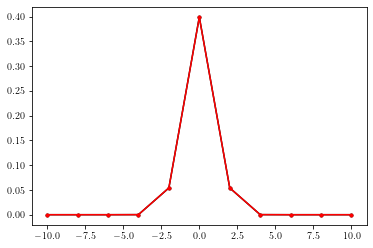

In [78]:
# for _ in rho[0]:
rho0 = np.abs(psi0)**2
plt.plot(x,rho0,'k.')
temp = gauss_psi(x,0,a=1/4/sig**2)
plt.plot(x,np.real(temp*temp.conjugate()),'k-')

Nt = 100
psi = (U**Nt)@psi0
rho = np.abs(psi)**2
plt.plot(x,rho,'r.')
temp = gauss_psi(x,Nt*dt,a=1/4/sig**2)
plt.plot(x,np.abs(temp)**2,'r-')


plt.show()

In [70]:
x = np.linspace(-20,20,1000)
psi = gauss_psi(x,0,a=1)
phi = np.fft.fftshift(np.fft.fft(psi))

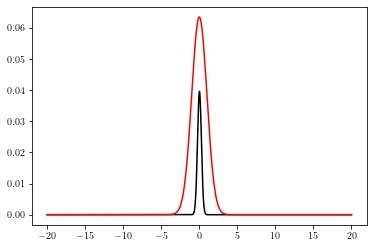

In [71]:
plt.plot(x,np.abs(phi)**2/(2*np.pi)**2/x.shape[0],'k-')

temp = (2/np.pi)**(1/4)*np.exp(-x**2/4)/np.sqrt(4*np.pi)
plt.plot(x,temp**2,'r-')

plt.show()

In [ ]:
x,x0,y,t,a = sp.symbols(r'x x_0 y t a',real=True)
sig,hbar,m = sp.symbols(r'\sigma h m',real=True,positive=True)

In [ ]:
K = sp.sqrt(a/t)*sp.exp(-a*(x-y)**2/t)
psi0 = (2*sp.pi*sig**2)**(-1/sp.S(4))*sp.exp(-(x-x0)**2/(4*sig**2))

In [ ]:
psi = sp.integrate(K*psi0.subs(x,y),(y,-sp.oo,sp.oo)).args[0][0].simplify()

In [ ]:
u,u0,tau = sp.symbols(r'u u_0 \tau',real=True)

In [ ]:
psi = psi.subs(x,sig*u).subs(x0,sig*u0).simplify().subs(t,hbar*tau/(2*m*sig**2)).simplify().subs(a,m/(2*sp.pi*sp.I*hbar)).simplify().expand().simplify()

In [ ]:
psi.conjugate()*psi.expand().simplify()

In [ ]:
psi0